# Reducing matrix bandwidth by sorting and compute block-tridiagonal representation of matrix

In this tutorial we will demostrate application of various sorting procedures to a list of atomic coodinates resultin in a reduced matrix bandwidth. Also, we will show how to to apply algorithms for computing the block-tridiagonal representation of a band matrix.

 _   _                   _   _      _   
| \ | | __ _ _ __   ___ | \ | | ___| |_ 
|  \| |/ _` | '_ \ / _ \|  \| |/ _ \ __|
| |\  | (_| | | | | (_) | |\  |  __/ |_ 
|_| \_|\__,_|_| |_|\___/|_| \_|\___|\__|
                                        

Vesion 1.0
The verbosity level is 1
The radius of the neighbourhood is 1.12 Ang

---------------------------------

The xyz-file:
 1888
Quantum billiard
A0 -23.898305084745765 -1.5254237288135606 -0.0
A1 -23.898305084745765 -0.5084745762711869 -0.0
A2 -23.898305084745765 0.5084745762711833 -0.0
A3 -23.898305084745765 1.525423728813557 -0.0
A4 -22.88135593220339 -6.610169491525426 -0.0
A5 -22.88135593220339 -5.593220338983052 -0.0
A6 -22.88135593220339 -4.576271186440678 -0.0
A7 -22.88135593220339 -3.5593220338983045 -0.0
A8 -22.88135593220339 -2.5423728813559343 -0.0
                  .                    
                  .                    
                  .                    
There are 1879 more coordinates
---------------------------

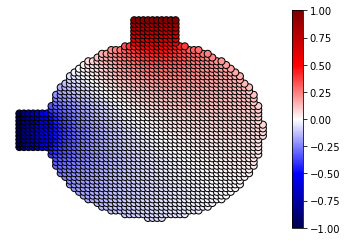

Basis set 
 Num of species {'A': 1888} 


 A 
title | energy | n | l | m | s
------+--------+---+---+---+--
s     | -1     | 0 | 0 | 0 | 0
------+--------+---+---+---+--
 
---------------------------------



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nanonet.tb as tb
from nanonet.tb.sorting_algorithms import sort_capacitance, sort_lexico, sort_projection


a = tb.Orbitals('A')
a.add_orbital(title='s', energy=-1, )
tb.set_tb_params(PARAMS_A_A={'ss_sigma': 0.3})

left_lead = np.array([ 644,  697,  750,  803,  857,  911,  965, 1019, 1072, 1125])
upper_lead = np.array([1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887])

h = tb.HamiltonianSp(xyz='../examples/input_samples/QB1888.xyz',
                     nn_distance=1.12,
                     sort_func=sort_capacitance,
                     left_lead=left_lead,
                     right_lead=upper_lead).initialize()



In [2]:
hl1, h01, hr1, subblocks = h.get_hamiltonians_block_tridiagonal()

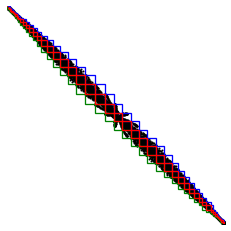

In [3]:
from nanonet.tb.block_tridiagonalization import show_blocks

show_blocks(subblocks, h.h_matrix)